# Dirichlet Process Mixture Models

The goal of this notebook is to implement DPMM on an appropriate dataset. 

First explain what a DPMM is

### Questions
- How does the clustering actually work? 
- How is the clustering different to t-SNE?
- Do the results in these papers hold true? [Posterior Distribution for the Number of Clusters in Dirichlet Process Mixture Models](https://arxiv.org/abs/1905.09959) and [Finite mixture models are typically inconsistent
for the number of components](http://approximateinference.org/2017/accepted/CaiEtAl2017.pdf) and [Inconsistency of Pitman–Yor Process Mixtures
for the Number of Components](http://jmlr.org/papers/volume15/miller14a/miller14a.pdf)

## What is a DPMM?



### DPMM in sklearn

- [DPMM](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.mixture.DPGMM.html)
- Example: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-download-auto-examples-mixture-plot-gmm-py
- mixtures: https://scikit-learn.org/stable/modules/mixture.html

In [1]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [11]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [13]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
#np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

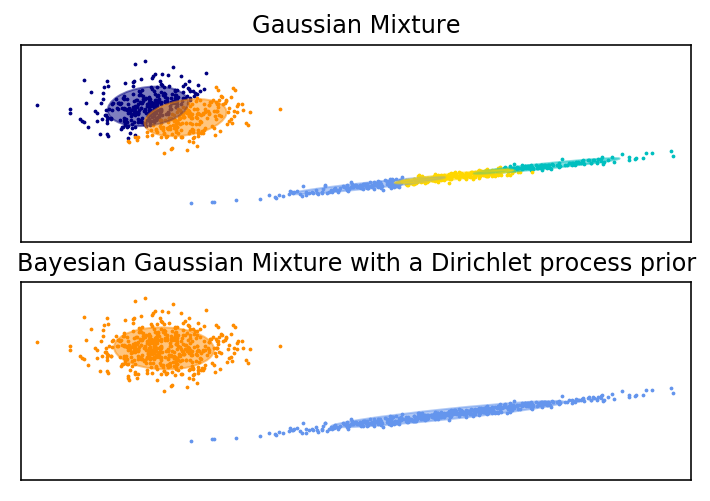

In [14]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=50,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

In [17]:
# posterior for number of components in dpmm

dpgmm.sample(100)

(array([[-6.27826346e+00,  3.00433308e+00],
        [-5.37377940e+00,  3.57768228e+00],
        [-6.48941545e+00,  3.82357053e+00],
        [-7.17897029e+00,  3.75310157e+00],
        [-5.68582778e+00,  4.02816820e+00],
        [-7.02379989e+00,  2.80294801e+00],
        [-7.34122540e+00,  2.34035499e+00],
        [-5.98705670e+00,  3.92224276e+00],
        [-5.94807715e+00,  3.41074128e+00],
        [-6.79005386e+00,  2.65361739e+00],
        [-6.66893044e+00,  3.51586545e+00],
        [-5.25294691e+00,  4.13123280e+00],
        [-5.93359473e+00,  2.90388686e+00],
        [-5.87514017e+00,  2.86852176e+00],
        [-5.03919776e+00,  2.43702796e+00],
        [-5.18469201e+00,  3.23559970e+00],
        [-4.39512664e+00,  3.99698355e+00],
        [-6.15537222e+00,  3.86438133e+00],
        [-6.72173512e+00,  3.14523291e+00],
        [-5.57187965e+00,  2.72573905e+00],
        [-5.58521755e+00,  2.82414122e+00],
        [-6.10401202e+00,  2.77988144e+00],
        [-6.62852297e+00,  2.271